In [2]:
import cv2
from matplotlib import pyplot as plt
raw = cv2.imread('JC.png')
plt.figure()
plt.imshow(raw)

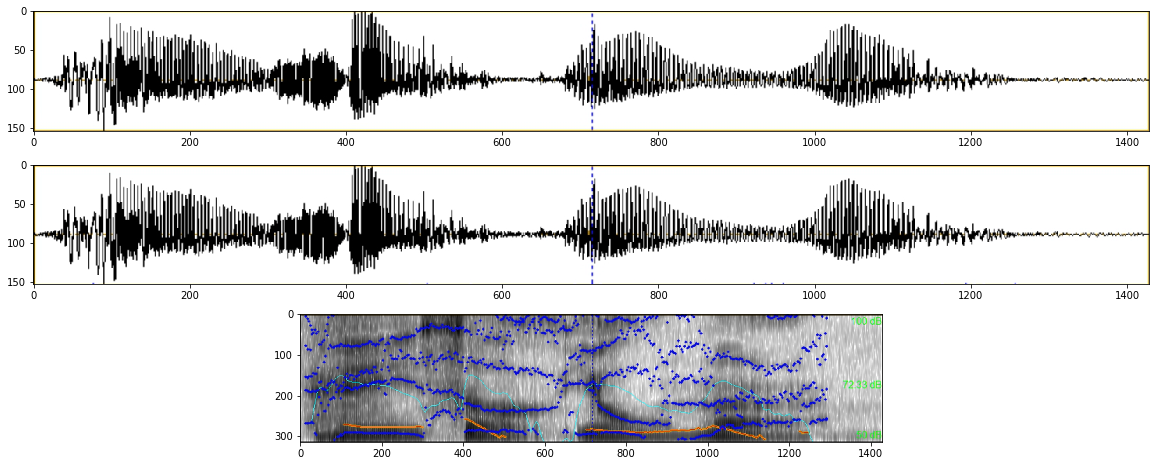

In [3]:
# split into 3 parts
channel_1 = raw[4:158, 3:-3]
channel_2 = raw[158:311, 3:-3]
spectrogram_raw = raw[311:-5, 3:-3]
plt.figure(figsize=[20, 8])
plt.subplot(3, 1, 1)
plt.imshow(channel_1)
plt.subplot(3, 1, 2)
plt.imshow(channel_2)
plt.subplot(3, 1, 3)
plt.imshow(spectrogram_raw)

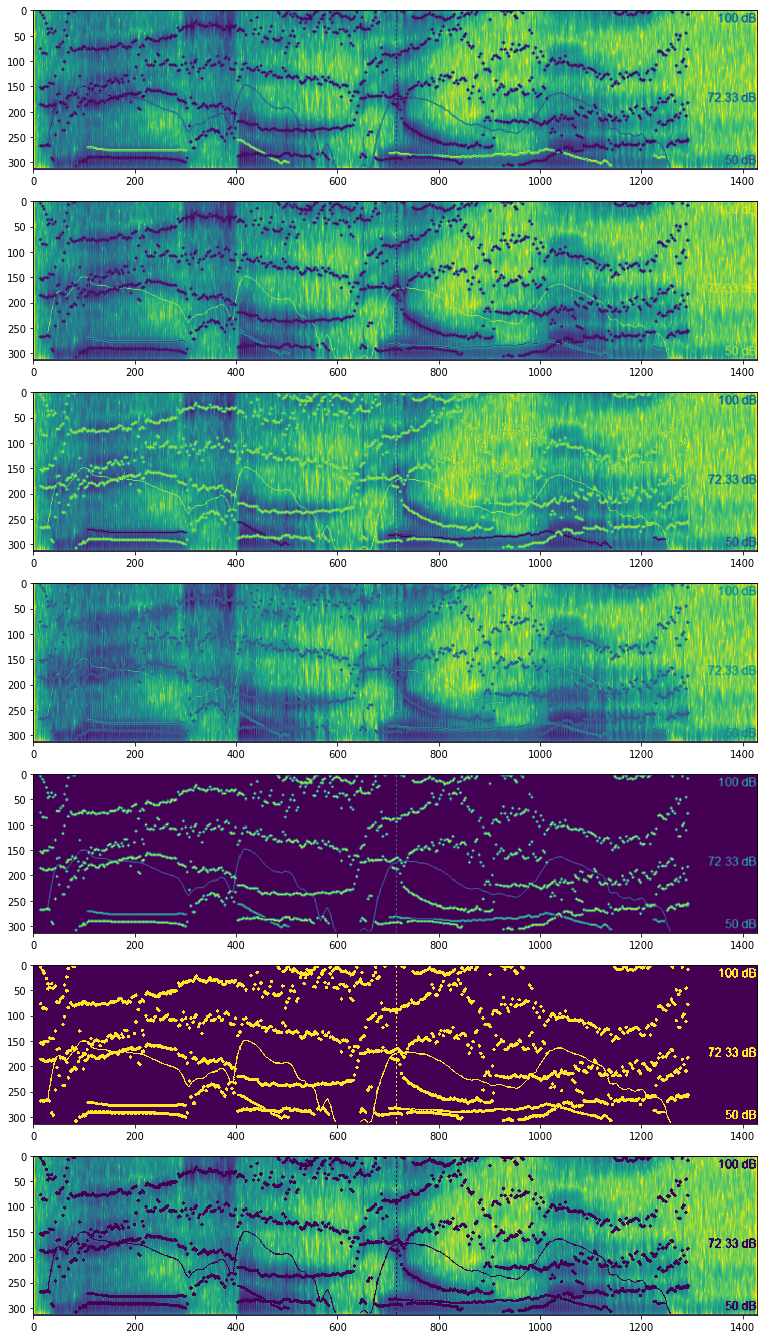

In [4]:
# additional info
import numpy as np

plt.figure(figsize=[20, 24])
plt.subplot(7, 1, 1)
plt.imshow(spectrogram_raw[:, :, 0])
plt.subplot(7, 1, 2)
plt.imshow(spectrogram_raw[:, :, 1])
plt.subplot(7, 1, 3)
plt.imshow(spectrogram_raw[:, :, 2])

avg = np.average(spectrogram_raw, axis=2)
plt.subplot(7, 1, 4)
plt.imshow(avg)

var = np.var(spectrogram_raw, axis=2)
m = np.min(var)
M = np.max(var)
var = (var - m) / (M - m)
plt.subplot(7, 1, 5)
plt.imshow(var)

split = 0.1
var[var > split] = 1
var[var < split] = 0
plt.subplot(7, 1, 6)
plt.imshow(var)

plt.subplot(7, 1, 7)
avg[var == 1] = 0
plt.imshow(avg)


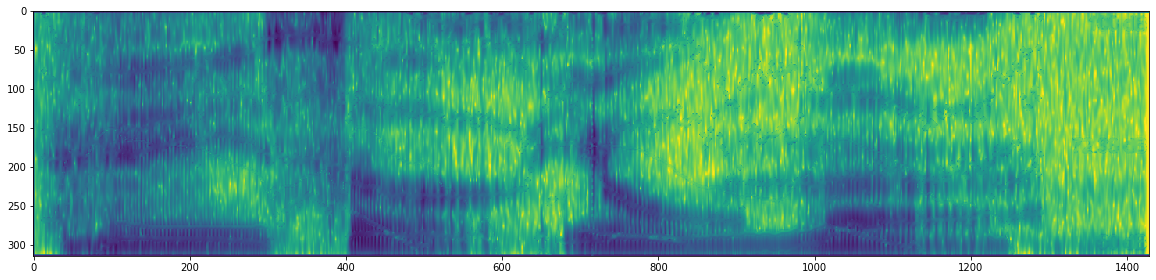

In [5]:
# interpolate
# 從頻率內差（上下）
# from scipy.interpolate import interp2d

avg = np.average(spectrogram_raw, axis=2)
dst = cv2.inpaint(
    avg.astype('float32'), var.astype('uint8'), 
    15, cv2.INPAINT_NS
)
plt.figure(figsize=[20, 10])
plt.imshow(dst)



In [8]:
cv2.imwrite('spectrogram.jpg', dst)

True